## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [1]:
import pandas as pd
import seaborn as sns

### Load the dataset

In [7]:
df = pd.read_csv("C:\\Users\\kteja\Downloads\\tips.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 1. Make a list of categorical and numerical columns in the data.

In [8]:
categorical = ["sex","smoker","day","time"]
numerical =["total_bill","tip","size"]


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Compute the average bill amount for each day.

In [24]:
g = df.groupby('day').mean()[['total_bill']]
g.head()

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.682742


### 3. Which gender is more generous in giving tips?

In [25]:
df.groupby('sex').mean()[["tip"]]

,tip
sex,
Female,2.833448
Male,3.089618


### 4. According to the data, were there more customers for dinner or lunch?

In [26]:
df.groupby('time').sum()[["size"]]

,size
time,
Dinner,463
Lunch,164


### 5. Based on the statistical summary, comment on the variable 'tip'

C:\Users\kteja\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tip', ylabel='Density'>

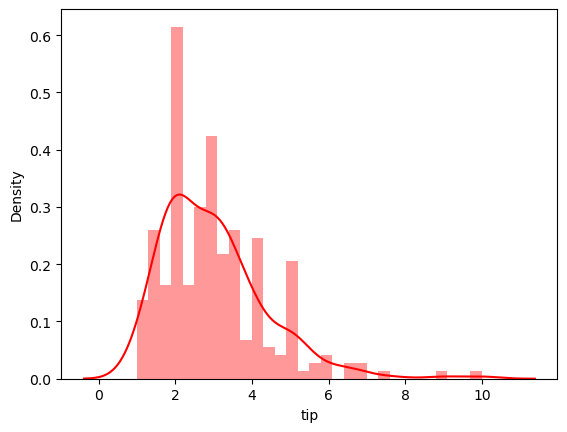

In [27]:
sns.distplot(df['tip'], kde = True, color ='red', bins = 30)

### 6. Find the busiest day in terms of the orders?

In [28]:
df.groupby('day').sum()[["size"]]

,size
day,
Fri,40
Sat,219
Sun,216
Thur,152


### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

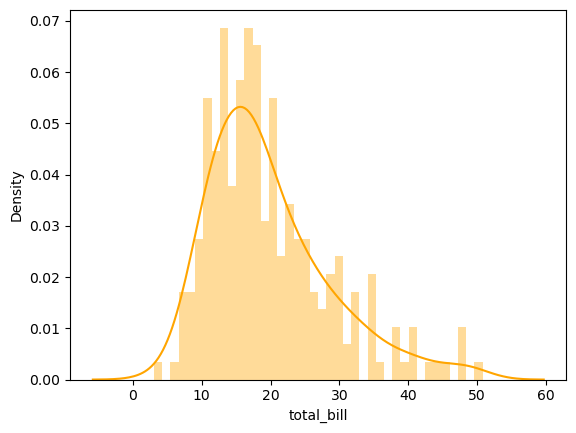

In [30]:
sns.distplot(df['total_bill'],kde=True,color='orange',bins=40)

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

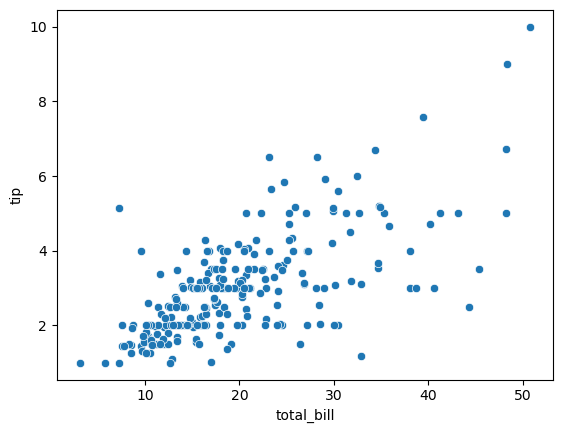

In [33]:
sns.scatterplot(x ='total_bill',y='tip',data=df)

### 9. What is the percentage of males and females in the dataset? and display it in the plot

<AxesSubplot:ylabel='None'>

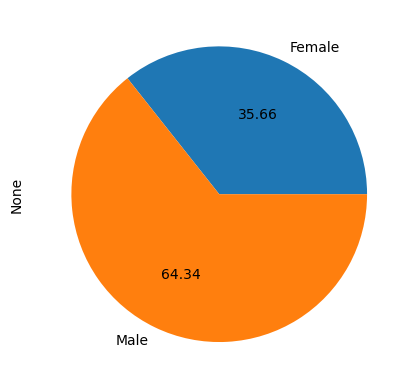

In [44]:
df.groupby('sex').size().plot(kind='pie', autopct='%.2f')

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

sex     smoker
Female  No        54
        Yes       33
Male    No        97
        Yes       60
dtype: int64


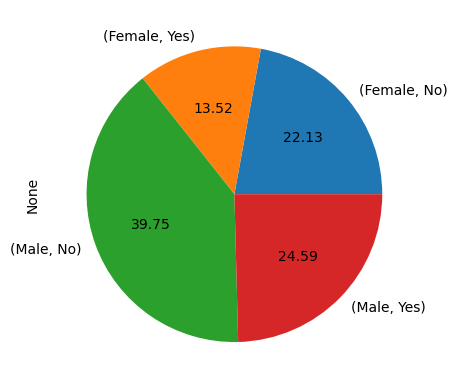

In [54]:
df.groupby('sex')[['smoker']].value_counts().plot(kind='pie',autopct='%.2f')
print(df.groupby('sex')[['smoker']].value_counts())

### 11. Compute the average tip amount given for different days and display it in the plot.

           tip
day           
Fri   2.734737
Sat   2.993103
Sun   3.255132
Thur  2.771452


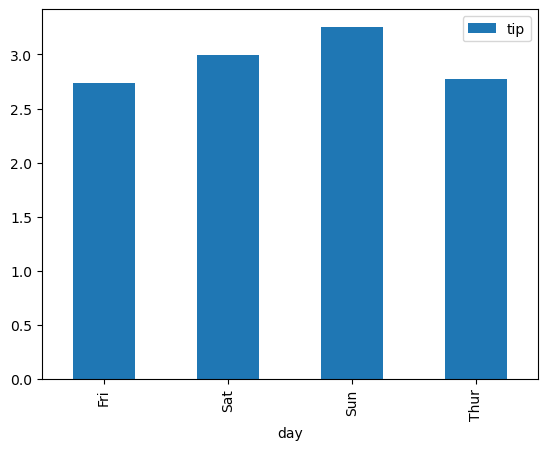

In [58]:
df.groupby('day')[['tip']].mean().plot(kind='bar')
print(df.groupby('day')[['tip']].mean())

### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

<AxesSubplot:xlabel='size'>

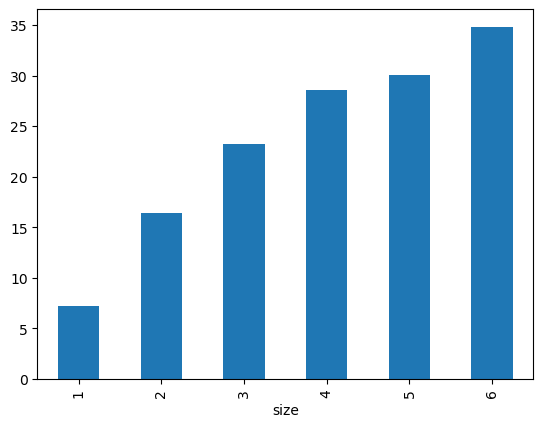

In [65]:
#sns.scatterplot(x = 'size',y='total_bill',data=df)
df.groupby('size')['total_bill'].mean().plot(kind='bar')

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

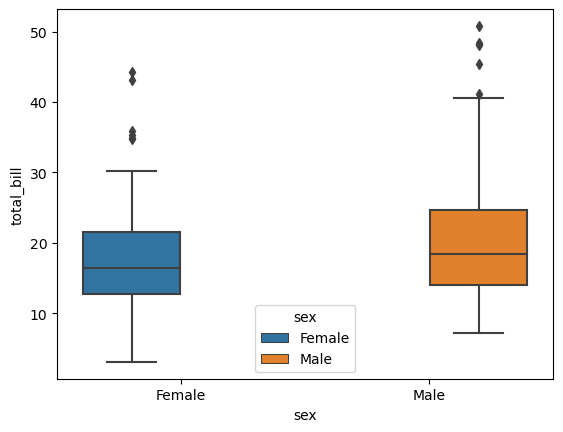

In [77]:
sns.boxplot(x='sex',y='total_bill', data=df,hue='sex')

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [88]:
df.head()
gk = df.groupby(['time','day'])[['total_bill']].max()
gk.head()


total_bill
time   day             
Dinner Fri        40.17
       Sat        50.81
       Sun        48.17
       Thur       18.78
Lunch  Fri        16.27

### 15. Compute the percentage of missing values in the dataset.

In [91]:
df.isna().sum()/df.shape[0]

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
dtype: float64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [95]:
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)
df.duplicated().sum()

1


0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot:xlabel='total_bill'>

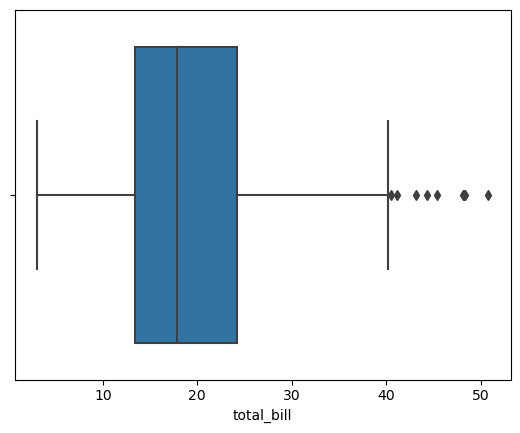

In [96]:
sns.boxplot(x='total_bill',data = df)

<AxesSubplot:xlabel='total_bill'>

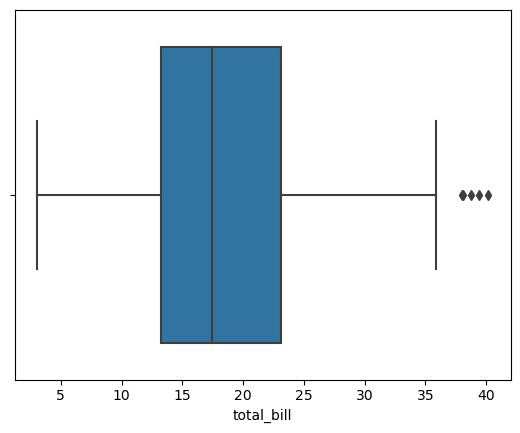

In [98]:
q1 = df['total_bill'].quantile(0.25)
q3 = df['total_bill'].quantile(0.75)
IQR = q3-q1
filterr=(df['total_bill']>=q1-1.5*IQR)&(df['total_bill']<=q3+1.5*IQR)
df = df.loc[filterr]
sns.boxplot(x='total_bill',data = df)

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot:xlabel='tip'>

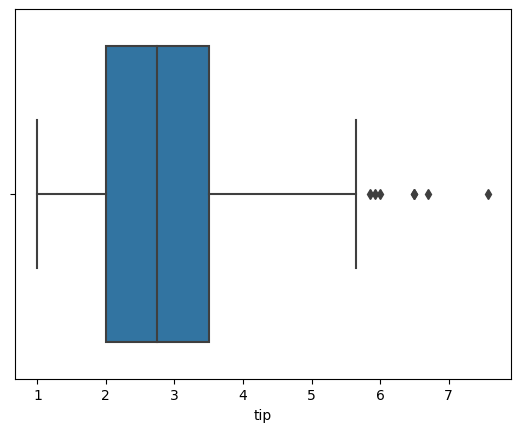

In [99]:
sns.boxplot(x='tip',data=df)

<AxesSubplot:xlabel='tip'>

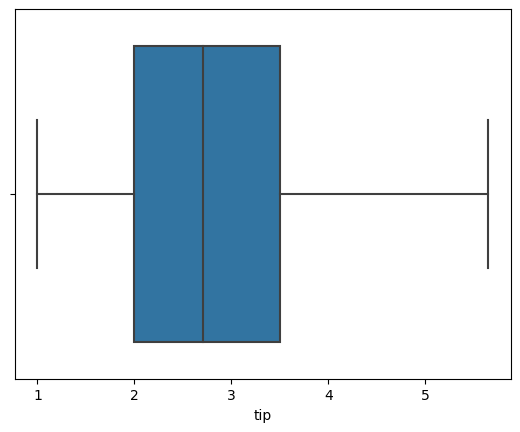

In [100]:
q1 = df['tip'].quantile(0.25)
q3 = df['tip'].quantile(0.75)
IQR = q3-q1
filterr=(df['tip']>=q1-1.5*IQR)&(df['tip']<=q3+1.5*IQR)
df = df.loc[filterr]
sns.boxplot(x='tip',data = df)

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [102]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df[categorical] = df[categorical].apply(lambda col: le.fit_transform(col))
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [103]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
df['total_bill'] = MinMaxScaler().fit_transform(np.array(df['total_bill']).reshape(-1,1))
  
# view normalized data  
display(df)

,total_bill,tip,sex,smoker,day,time,size
0,0.375202,1.01,0,0,2,0,2
1,0.195957,1.66,1,0,2,0,3
2,0.483558,3.50,1,0,2,0,3
3,0.555526,3.31,1,0,2,0,2
4,0.580054,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
238,0.883019,4.67,0,0,1,0,3
240,0.649865,2.00,0,1,1,0,2
241,0.528302,2.00,1,1,1,0,2
242,0.397574,1.75,1,0,1,0,2


### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

In [105]:
tips_df = df
tips_df.head()
X=df.drop('total_bill',axis=1)
y = df['total_bill']

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X['size'] = MinMaxScaler().fit_transform(np.array(X['size']).reshape(-1,1))

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.

In [108]:
regr = LinearRegression()
regr.fit(X_train, y_train)
print(regr.score(X_test, y_test))

0.27006178844144324


### Happy Learning:)